# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


###  Import Statements


In [71]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [72]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [73]:
df_data = pd.read_csv('NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [74]:
print(f'There are {df_data.shape[0]} rows and {df_data.shape[1]} columns')

There are 2000 rows and 96 columns


In [75]:
df_data.columns

Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN'

In [76]:
df_data.isna().values.any()

# There are missing values in the dataframe

True

## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [77]:
df_data.isna().sum().sort_values(ascending=False).head(20)

# There are 16 columns with missing values
# Not necessary to drop the rows with missing values.

PRMONF      1073
PRMONM       879
PRFSTYAE     790
PRFSTYAN     790
PRFSTYUN     790
PRFSTYPE     790
PRMSTYUN     533
PRMSTYPE     533
PRMSTYAN     533
PRMSTYAE     533
SFR          399
POVRAT97     373
HHINC97      370
SMR           82
JOBS          47
AGEMBTH       44
ID             0
SM             0
REG97NE        0
SF             0
dtype: int64

In [78]:
df_data.duplicated().values.sum()

# There are 513 duplicated rows

513

In [79]:
df_data.drop_duplicates(inplace=True)

In [80]:
df_data.shape

# Shape of dataframe after dropping duplicated rows

(1487, 96)

## Descriptive Statistics

In [81]:
df_data.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,453.00","1,205.00",...,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00"
mean,"3,547.13",18.81,14.56,6.70,0.49,0.51,"1,982.07",28.93,26.32,"58,310.67",...,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00
std,"2,009.84",12.00,2.77,2.86,0.50,0.50,1.38,1.38,5.08,"43,868.05",...,0.43,0.36,0.44,0.47,0.42,0.21,0.50,0.49,0.04,0.00
min,1.00,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,12.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,888.00",11.41,12.00,4.65,0.00,0.00,"1,981.00",28.00,23.00,"32,000.00",...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,474.00",15.75,15.00,6.63,0.00,1.00,"1,982.00",29.00,26.00,"50,500.00",...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,160.50",22.60,16.00,8.71,1.00,1.00,"1,983.00",30.00,30.00,"72,000.00",...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,980.00",132.89,20.00,14.73,1.00,1.00,"1,984.00",31.00,45.00,"246,474.00",...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


In [82]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1487 entries, 0 to 1995
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1487 non-null   int64  
 1   EARNINGS  1487 non-null   float64
 2   S         1487 non-null   int64  
 3   EXP       1487 non-null   float64
 4   FEMALE    1487 non-null   int64  
 5   MALE      1487 non-null   int64  
 6   BYEAR     1487 non-null   int64  
 7   AGE       1487 non-null   int64  
 8   AGEMBTH   1453 non-null   float64
 9   HHINC97   1205 non-null   float64
 10  POVRAT97  1203 non-null   float64
 11  HHBMBF    1487 non-null   int64  
 12  HHBMOF    1487 non-null   int64  
 13  HHOMBF    1487 non-null   int64  
 14  HHBMONLY  1487 non-null   int64  
 15  HHBFONLY  1487 non-null   int64  
 16  HHOTHER   1487 non-null   int64  
 17  MSA97NO   1487 non-null   int64  
 18  MSA97NCC  1487 non-null   int64  
 19  MSA97CC   1487 non-null   int64  
 20  MSA97NK   1487 non-null   int6

Understand relationship of variables with the earnings

In [83]:
# Check for Gender

print(f'Male Count: {df_data.FEMALE.value_counts()[0]}, Female Count: {df_data.FEMALE.value_counts()[1]} \n')

print(f'Female average earnings: {df_data[df_data.FEMALE == 1].EARNINGS.mean()}')
print(f'Male average earnings: {df_data[df_data.MALE == 1].EARNINGS.mean()}')

Male Count: 761, Female Count: 726 

Female average earnings: 17.342741046831954
Male average earnings: 20.203876478318


In [84]:
# Check for Ethnicity

ethnic_count = df_data.groupby(by=['ETHBLACK', 'ETHHISP', 'ETHWHITE'], as_index=False).agg(Count=('ID', 'count'))
print(ethnic_count, '\n')

ethnic_mean = df_data.groupby(by=['ETHBLACK', 'ETHHISP', 'ETHWHITE'], as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
print(ethnic_mean)

   ETHBLACK  ETHHISP  ETHWHITE  Count
0         0        0         1   1138
1         0        1         0    169
2         1        0         0    180 

   ETHBLACK  ETHHISP  ETHWHITE  Average_Earnings
0         0        0         1             19.42
1         0        1         0             18.29
2         1        0         0             15.43


In [85]:
# Check for Age in 2011

age_counts = df_data.AGE.value_counts()
print(age_counts, '\n')

age_avg_earnings = df_data.groupby(by='AGE', as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
age_avg_earnings

28    315
29    312
30    304
27    300
31    256
Name: AGE, dtype: int64 



,AGE,Average_Earnings
0,27,18.25
1,28,17.08
2,29,18.79
3,30,20.20
4,31,19.95


In [86]:
# Check for Years of Schooling

years_of_school_earnings = df_data.groupby(by='S', as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
years_of_school_earnings

# The higher the number of schooling years, the higher the earnings

,S,Average_Earnings
0,6,8.50
1,8,12.91
2,9,12.22
3,10,14.61
4,11,12.33
5,12,16.34
6,13,15.62
7,14,17.49
8,15,17.45
9,16,21.59


In [87]:
# Check for Highest Educational qualification

education_count = df_data.groupby(by=['EDUCPROF','EDUCPHD','EDUCMAST','EDUCBA','EDUCAA','EDUCHSD','EDUCGED','EDUCDO'],
                                  as_index=False).agg(Count=('ID', 'count'))
education_count

,EDUCPROF,EDUCPHD,EDUCMAST,EDUCBA,EDUCAA,EDUCHSD,EDUCGED,EDUCDO,Count
0,0,0,0,0,0,0,0,1,57
1,0,0,0,0,0,0,1,0,110
2,0,0,0,0,0,1,0,0,586
3,0,0,0,0,1,0,0,0,135
4,0,0,0,1,0,0,0,0,454
5,0,0,1,0,0,0,0,0,119
6,0,1,0,0,0,0,0,0,4
7,1,0,0,0,0,0,0,0,22


In [88]:
# Check for Highest Educational qualification and Relationship with Earnings

education_earnings = df_data.groupby(by=['EDUCPROF','EDUCPHD','EDUCMAST','EDUCBA','EDUCAA','EDUCHSD','EDUCGED','EDUCDO'],
                                  as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
education_earnings

# Highest earnings for a professional degree while the lowest earnings for a high school dropout

,EDUCPROF,EDUCPHD,EDUCMAST,EDUCBA,EDUCAA,EDUCHSD,EDUCGED,EDUCDO,Average_Earnings
0,0,0,0,0,0,0,0,1,13.55
1,0,0,0,0,0,0,1,0,12.60
2,0,0,0,0,0,1,0,0,16.65
3,0,0,0,0,1,0,0,0,17.91
4,0,0,0,1,0,0,0,0,21.52
5,0,0,1,0,0,0,0,0,24.41
6,0,1,0,0,0,0,0,0,29.41
7,1,0,0,0,0,0,0,0,38.01


In [89]:
# Check for Marital Status

marital_status_count = df_data.groupby(by=['SINGLE', 'MARRIED', 'COHABIT', 'OTHSING'], as_index=False).agg(Count=('ID', 'count'))
print(marital_status_count, '\n')

marital_status_earnings =  df_data.groupby(by=['SINGLE', 'MARRIED', 'COHABIT', 'OTHSING'], as_index=False).\
    agg(Average_Earnings=('EARNINGS', 'mean'))
print(marital_status_earnings)

   SINGLE  MARRIED  COHABIT  OTHSING  Count
0       0        0        0        1     98
1       0        0        1        0    281
2       0        1        0        0    620
3       1        0        0        0    488 

   SINGLE  MARRIED  COHABIT  OTHSING  Average_Earnings
0       0        0        0        1             14.96
1       0        0        1        0             16.45
2       0        1        0        0             20.49
3       1        0        0        0             18.80


In [90]:
# Check for Score in the ASVAB Battery
from sklearn.preprocessing import StandardScaler

# The ASVABMV column has to be standardized to match the other columns' scores
asvab_col_names = ['ASVABWK','ASVABPC','ASVABNO','ASVABMV','ASVABCS','ASVABC4','ASVABC','ASVABAR','VERBAL']
asvab_scores = df_data[asvab_col_names].copy()

scaler = StandardScaler()
scaler.fit(asvab_scores[['ASVABMV']])
asvab_scores['ASVABMV'] = scaler.transform(asvab_scores[['ASVABMV']])
df_data['ASVABMV'] = asvab_scores['ASVABMV']

asvab_scores.describe()

,ASVABWK,ASVABPC,ASVABNO,ASVABMV,ASVABCS,ASVABC4,ASVABC,ASVABAR,VERBAL
count,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00"
mean,0.16,0.16,0.15,-0.00,0.15,0.20,0.21,0.22,0.17
std,0.94,0.95,0.99,1.00,0.97,0.94,0.93,0.93,0.94
min,-3.11,-2.61,-3.87,-2.01,-4.87,-2.91,-3.05,-3.00,-2.89
25%,-0.45,-0.44,-0.51,-0.82,-0.53,-0.37,-0.33,-0.30,-0.44
50%,0.25,0.26,0.18,0.11,0.17,0.29,0.29,0.29,0.28
75%,0.81,0.85,0.82,0.86,0.82,0.87,0.86,0.80,0.84
max,2.88,2.41,3.82,1.57,3.15,2.54,2.64,2.63,2.70


In [91]:
# Check for Faith

faith_count = df_data.groupby(by=['FAITHN','FAITHC','FAITHJ','FAITHP','FAITHO','FAITHM'], as_index=False).agg(Count=('ID', 'count'))
print(faith_count, '\n')

faith_earnings =  df_data.groupby(by=['FAITHN','FAITHC','FAITHJ','FAITHP','FAITHO','FAITHM'], as_index=False).\
    agg(Average_Earnings=('EARNINGS', 'mean'))
print(faith_earnings)

   FAITHN  FAITHC  FAITHJ  FAITHP  FAITHO  FAITHM  Count
0       0       0       0       0       0       1     93
1       0       0       0       0       1       0     35
2       0       0       0       1       0       0    843
3       0       0       1       0       0       0     17
4       0       1       0       0       0       0    466
5       1       0       0       0       0       0     33 

   FAITHN  FAITHC  FAITHJ  FAITHP  FAITHO  FAITHM  Average_Earnings
0       0       0       0       0       0       1             19.41
1       0       0       0       0       1       0             20.64
2       0       0       0       1       0       0             18.25
3       0       0       1       0       0       0             24.01
4       0       1       0       0       0       0             19.29
5       1       0       0       0       0       0             19.92


In [92]:
# Check for Household Location - Metropolitan Statistics

metropolitan_col_names = ['MSA97NO','MSA97NCC','MSA97CC','MSA97NK']

metropolitan_count = df_data.groupby(by=metropolitan_col_names, as_index=False).agg(Count=('ID', 'count'))
print(metropolitan_count, '\n')

metropolitan_avg_earnings = df_data.groupby(by=metropolitan_col_names, as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
print(metropolitan_avg_earnings)

   MSA97NO  MSA97NCC  MSA97CC  MSA97NK  Count
0        0         0        0        1     13
1        0         0        1        0    390
2        0         1        0        0    793
3        1         0        0        0    291 

   MSA97NO  MSA97NCC  MSA97CC  MSA97NK  Average_Earnings
0        0         0        0        1             16.60
1        0         0        1        0             17.89
2        0         1        0        0             20.44
3        1         0        0        0             15.69


In [93]:
# Check for Household Location - Rural or Urban

rural_urban_col_names = ['RS97RURL','RS97URBN','RS97UNKN']

rural_urban_count = df_data.groupby(by=rural_urban_col_names, as_index=False).agg(Count=('ID', 'count'))
print(rural_urban_count, '\n')

rural_urban_earnings = df_data.groupby(by=rural_urban_col_names, as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
print(rural_urban_earnings)

   RS97RURL  RS97URBN  RS97UNKN  Count
0         0         1         0   1061
1         1         0         0    426 

   RS97RURL  RS97URBN  RS97UNKN  Average_Earnings
0         0         1         0             19.24
1         1         0         0             17.73


In [94]:
# Check for Household Location - Census Region

census_region_col_names = ['REG97NE','REG97NC','REG97W','REG97S']

census_region_count = df_data.groupby(by=census_region_col_names, as_index=False).agg(Count=('ID', 'count'))
print(census_region_count, '\n')

census_region_avg_earnings = df_data.groupby(by=census_region_col_names, as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
print(census_region_avg_earnings)

   REG97NE  REG97NC  REG97W  REG97S  Count
0        0        0       0       1    461
1        0        0       1       0    313
2        0        1       0       0    461
3        1        0       0       0    252 

   REG97NE  REG97NC  REG97W  REG97S  Average_Earnings
0        0        0       0       1             17.84
1        0        0       1       0             19.42
2        0        1       0       0             18.21
3        1        0       0       0             20.90


In [95]:
# Check for Household structure

hold_structure_col_names = ['HHBMBF','HHBMOF','HHOMBF','HHBMONLY','HHBFONLY','HHOTHER']

hold_structure_count = df_data.groupby(by=hold_structure_col_names, as_index=False).agg(Count=('ID', 'count'))
print(hold_structure_count, '\n')

hold_structure_avg_earnings = df_data.groupby(by=hold_structure_col_names, as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
print(hold_structure_avg_earnings)

   HHBMBF  HHBMOF  HHOMBF  HHBMONLY  HHBFONLY  HHOTHER  Count
0       0       0       0         0         0        1     22
1       0       0       0         0         1        0     38
2       0       0       0         1         0        0    266
3       0       0       1         0         0        0     31
4       0       1       0         0         0        0    128
5       1       0       0         0         0        0   1002 

   HHBMBF  HHBMOF  HHOMBF  HHBMONLY  HHBFONLY  HHOTHER  Average_Earnings
0       0       0       0         0         0        1             15.97
1       0       0       0         0         1        0             15.00
2       0       0       0         1         0        0             17.06
3       0       0       1         0         0        0             16.46
4       0       1       0         0         0        0             16.31
5       1       0       0         0         0        0             19.87


In [96]:
# Check for Household Income

household_income = df_data[['HHINC97', 'POVRAT97']].copy()
household_income.describe()

,HHINC97,POVRAT97
count,"1,205.00","1,203.00"
mean,"58,310.67",362.26
std,"43,868.05",294.23
min,0.00,0.00
25%,"32,000.00",190.50
50%,"50,500.00",302.00
75%,"72,000.00",441.00
max,"246,474.00","1,627.00"


In [97]:
# Check for Parental Monitoring

p_monitor = df_data[['PRMONM', 'PRMONF']].copy()
print(p_monitor.info(), '\n')

p_monitor_count = df_data.groupby(by=['PRMONM', 'PRMONF'], as_index=False).agg(Count=('ID', 'count'))
print(p_monitor_count.sort_values(by='Count', ascending=False), '\n')

p_monitor_avg_earnings = df_data.groupby(by=['PRMONM', 'PRMONF'], as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
p_monitor_avg_earnings.sort_values(by='Average_Earnings', ascending=False)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1487 entries, 0 to 1995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRMONM  851 non-null    float64
 1   PRMONF  698 non-null    float64
dtypes: float64(2)
memory usage: 34.9 KB
None 

     PRMONM  PRMONF  Count
94    11.00   11.00     22
106   12.00   10.00     19
108   12.00   12.00     18
66     9.00    8.00     17
119   13.00   12.00     15
..      ...     ...    ...
8      2.00    5.00      1
95    11.00   12.00      1
122   14.00    0.00      1
123   14.00    3.00      1
0      0.00    0.00      1

[149 rows x 3 columns] 



,PRMONM,PRMONF,Average_Earnings
21,4.00,5.00,60.10
48,7.00,11.00,56.25
6,2.00,1.00,41.96
110,12.00,14.00,38.46
95,11.00,12.00,36.15
...,...,...,...
12,3.00,4.00,7.50
135,15.00,9.00,7.25
41,7.00,2.00,6.74
3,1.00,3.00,5.00


In [98]:
# Check for Parental Style 

parental_style_col_names = ['PRMSTYUN','PRMSTYPE','PRMSTYAN','PRMSTYAE','PRFSTYUN','PRFSTYPE','PRFSTYAN','PRFSTYAE']

fatherly_style_count = df_data.groupby(by=parental_style_col_names[:4], as_index=False).agg(Count=('ID', 'count'))
print(fatherly_style_count, '\n')

fatherly_style_avg_earnings = df_data.groupby(by=parental_style_col_names[:4], as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
print(fatherly_style_avg_earnings, '\n')

motherly_style_count = df_data.groupby(by=parental_style_col_names[4:], as_index=False).agg(Count=('ID', 'count'))
print(motherly_style_count, '\n')

motherly_style_avg_earnings = df_data.groupby(by=parental_style_col_names[4:], as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
print(motherly_style_avg_earnings)

   PRMSTYUN  PRMSTYPE  PRMSTYAN  PRMSTYAE  Count
0      0.00      0.00      0.00      1.00    352
1      0.00      0.00      1.00      0.00    146
2      0.00      1.00      0.00      0.00    437
3      1.00      0.00      0.00      0.00    165 

   PRMSTYUN  PRMSTYPE  PRMSTYAN  PRMSTYAE  Average_Earnings
0      0.00      0.00      0.00      1.00             18.91
1      0.00      0.00      1.00      0.00             17.48
2      0.00      1.00      0.00      0.00             19.10
3      1.00      0.00      0.00      0.00             18.12 

   PRFSTYUN  PRFSTYPE  PRFSTYAN  PRFSTYAE  Count
0      0.00      0.00      0.00      1.00    291
1      0.00      0.00      1.00      0.00    174
2      0.00      1.00      0.00      0.00    285
3      1.00      0.00      0.00      0.00    154 

   PRFSTYUN  PRFSTYPE  PRFSTYAN  PRFSTYAE  Average_Earnings
0      0.00      0.00      0.00      1.00             19.81
1      0.00      0.00      1.00      0.00             17.21
2      0.00      1.00   

In [99]:
# Check for work related variables(EARNINGS AND HOURS)

print(f'Average Hourly Earnings: {df_data.EARNINGS.mean():.4}')

df_data[['EARNINGS', 'HOURS']].describe()

Average Hourly Earnings: 18.81


,EARNINGS,HOURS
count,"1,487.00","1,487.00"
mean,18.81,39.10
std,12.00,10.90
min,2.00,10.00
25%,11.41,37.00
50%,15.75,40.00
75%,22.60,40.00
max,132.89,80.00


In [100]:
# Check for work related variables(TENURE, JOBS, EXP)

df_data[['TENURE', 'EXP', 'JOBS']].describe()

,TENURE,EXP,JOBS
count,"1,487.00","1,487.00","1,449.00"
mean,3.56,6.70,5.90
std,2.63,2.86,3.27
min,0.06,0.00,1.00
25%,1.21,4.65,3.00
50%,3.10,6.63,5.00
75%,5.31,8.71,8.00
max,11.77,14.73,24.00


In [101]:
# Check for work related variables(COLLBARG)
collbarg_count = df_data.groupby('COLLBARG', as_index=False).agg(Count=('ID', 'count'))
print(collbarg_count, '\n')

collbarg_avg_earnings = df_data.groupby('COLLBARG', as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
print(collbarg_avg_earnings)

   COLLBARG  Count
0         0   1312
1         1    175 

   COLLBARG  Average_Earnings
0         0             18.26
1         1             22.88


In [102]:
# Check for category of employment
cat_col_names = ['CATGOV','CATPRI','CATSE','CATNPO','CATMIS']

cat_count = df_data.groupby(by=cat_col_names, as_index=False).agg(Count=('ID', 'count'))
print(cat_count, '\n')

cat_avg_earnings = df_data.groupby(by=cat_col_names, as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
print(cat_avg_earnings)

   CATGOV  CATPRI  CATSE  CATNPO  CATMIS  Count
0       0       0      0       0       1     92
1       0       0      0       1       0    113
2       0       0      1       0       1      8
3       0       0      1       1       0      4
4       0       1      0       0       0   1017
5       0       1      1       0       0     83
6       1       0      0       0       0    166
7       1       0      1       0       0      4 

   CATGOV  CATPRI  CATSE  CATNPO  CATMIS  Average_Earnings
0       0       0      0       0       1             16.93
1       0       0      0       1       0             19.17
2       0       0      1       0       1             18.43
3       0       0      1       1       0             11.67
4       0       1      0       0       0             18.07
5       0       1      1       0       0             26.49
6       1       0      0       0       0             20.19
7       1       0      1       0       0             31.18


In [103]:
# Check for Living in 2011(Metropolitan statistics)
living_metro_col_names = ['MSA11NO','MSA11NCC','MSA11CC','MSA11NK','MSA11NIC']

living_metro_count = df_data.groupby(by=living_metro_col_names, as_index=False).agg(Count=('ID', 'count'))
print(living_metro_count, '\n')

living_metro_avg_earnings = df_data.groupby(by=living_metro_col_names, as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
print(living_metro_avg_earnings)

   MSA11NO  MSA11NCC  MSA11CC  MSA11NK  MSA11NIC  Count
0        0         0        0        1         0      3
1        0         0        1        0         0    615
2        0         1        0        0         0    801
3        1         0        0        0         0     68 

   MSA11NO  MSA11NCC  MSA11CC  MSA11NK  MSA11NIC  Average_Earnings
0        0         0        0        1         0             28.75
1        0         0        1        0         0             19.56
2        0         1        0        0         0             18.35
3        1         0        0        0         0             16.99


In [104]:
# Check for Living in 2011(Rural/Urban)
living_urban_count = df_data.groupby(by='URBAN', as_index=False).agg(Count=('ID', 'count'))
print(living_urban_count, '\n')

living_urban_avg_earnings = df_data.groupby(by='URBAN', as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
print(living_urban_avg_earnings)

   URBAN  Count
0      0    340
1      1   1141
2      2      6 

   URBAN  Average_Earnings
0      0             18.23
1      1             18.97
2      2             20.47


In [105]:
# Check for Living in 2011(Census Region)
living_region_col_names = ['REGNE','REGNC','REGW','REGS']

living_region_count = df_data.groupby(by=living_region_col_names, as_index=False).agg(Count=('ID', 'count'))
print(living_region_count, '\n')

living_region_avg_earnings = df_data.groupby(by=living_region_col_names, as_index=False).agg(Average_Earnings=('EARNINGS', 'mean'))
print(living_region_avg_earnings)

   REGNE  REGNC  REGW  REGS  Count
0      0      0     0     1    341
1      0      0     1     0    510
2      0      1     0     0    401
3      1      0     0     0    235 

   REGNE  REGNC  REGW  REGS  Average_Earnings
0      0      0     0     1             20.40
1      0      0     1     0             17.99
2      0      1     0     0             17.35
3      1      0     0     0             20.74


## Visualise the Features

Visualize relationship of variables with the earnings

In [106]:
# Check for Gender - Earnings Distribution

df_data['GENDER'] = df_data[['MALE', 'FEMALE']].idxmax(axis=1)

fig = px.scatter(data_frame=df_data, x='ID', y='EARNINGS', color='GENDER', title='Distribution of Earnings in 2011 Based on Gender')
fig.show()

In [107]:
# Check for Gender - Count

px.bar(x=df_data['GENDER'].value_counts().index, y=df_data['GENDER'].value_counts().values, title='Gender Count')

In [108]:
# Check for Ethnicity
df_data['ETHNICITY'] = df_data[['ETHBLACK', 'ETHHISP', 'ETHWHITE']].idxmax(axis=1)

px.scatter(data_frame=df_data, x='ID', y='EARNINGS', color='ETHNICITY', title='Distribution of Earnings in 2011 Based on Ethnicity')

Text(0.5, 0, 'Years of Schooling')

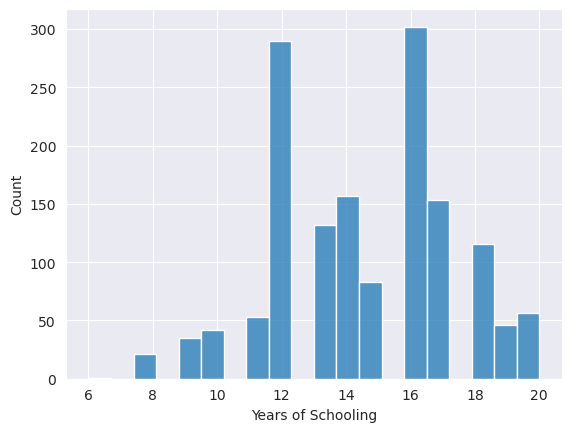

In [109]:
# Check for Years of Schooling - Count

sns.set_style('darkgrid')
sns.histplot(data=df_data, x='S')
plt.xlabel('Years of Schooling')

In [110]:
# Check for Years of Schooling - Relation to Earnings

fig = px.histogram(data_frame=df_data, x='S', y='EARNINGS')
fig.update_layout(xaxis_title='Years of Schooling')
fig.show()

In [111]:
# Check for Highest Educational qualification - Educational Profession with Earnings

df_data['EDUCATION'] = df_data[['EDUCPROF','EDUCPHD','EDUCMAST','EDUCBA','EDUCAA','EDUCHSD','EDUCGED','EDUCDO']].idxmax(axis=1)

px.scatter(data_frame=df_data, x='ID', y='EARNINGS', color='EDUCATION')

In [112]:
# Check for Highest Educational qualification - Relationship with Years of Schooling

counts = df_data.groupby(['S', 'EDUCATION']).size().reset_index(name='COUNT')

# Create a stacked bar chart
fig = go.Figure()
for education_level in counts['EDUCATION'].unique():
    filtered_data = counts[counts['EDUCATION'] == education_level]
    fig.add_trace(go.Bar(
        x=filtered_data['S'],
        y=filtered_data['COUNT'],
        name=education_level
    ))

fig.update_layout(
    xaxis=dict(title='Years of Schooling'),
    yaxis=dict(title='Count'),
    title='Stacked Bar Chart of Years of Schooling by Education',
    barmode='stack'
)

fig.show()

In [113]:
# Check for Score in the ASVAB Battery

# Create a box plot using Plotly
fig = go.Figure()

for column in df_data[asvab_col_names]:
    fig.add_trace(go.Box(y=df_data[column], name=column, boxmean=True))

fig.update_layout(
    title='Box Plot of Standardized ASVAB Scores',
    xaxis_title='Features',
    yaxis_title='Standardized Values',
)

fig.show()

In [114]:
# Check for Household Location - Rural or Urban Earnings
df_data['LOCATION'] = df_data[['RS97RURL','RS97URBN']].idxmax(axis=1)

px.scatter(data_frame=df_data, x='ID', y='EARNINGS', color='LOCATION', title='Scatter plot of Earnings based on Location')

Text(0.5, 1.0, 'Distribution between Gross household income at 1997 and Hourly Earnings at 2011 interview')

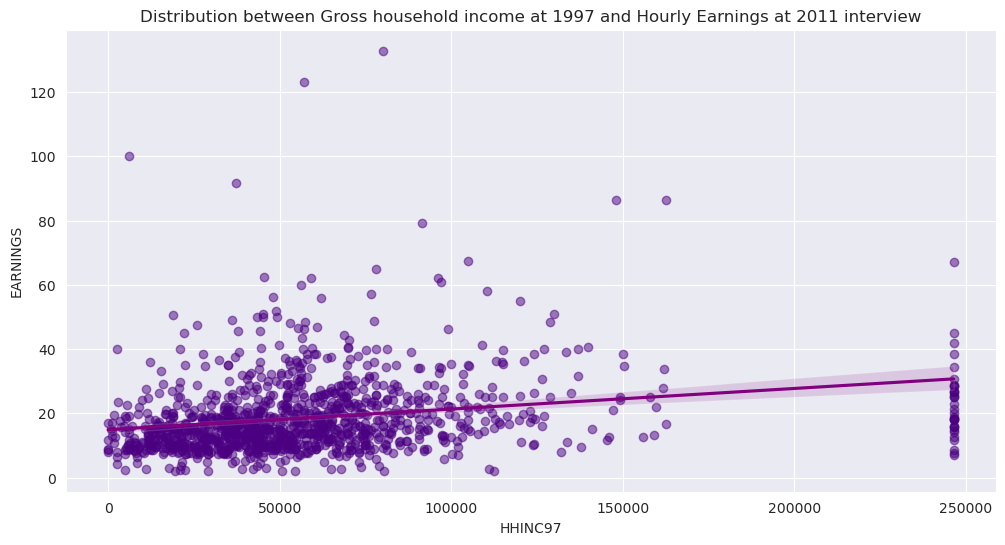

In [115]:
# Check for Household Income

plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.regplot(data=df_data, x='HHINC97', y='EARNINGS', scatter_kws={'alpha': 0.5}, 
            color='indigo', marker='o', line_kws={'color': 'purple'})
plt.title('Distribution between Gross household income at 1997 and Hourly Earnings at 2011 interview')

In [116]:
# Check for work related variables(EARNINGS)

px.violin(data_frame=df_data, y='EARNINGS', title='Violin Plot of Earnings')

In [117]:
# Check for work related variables(HOURS)

px.scatter(data_frame=df_data, x='ID', y='EARNINGS', color='HOURS', color_continuous_scale=px.colors.cmocean.haline_r,
           title='Scatter Plot of Earnings by ID based on the Usual Number of Hours worked per week')

In [118]:
# Check for category of employment

df_data['CATEGORY'] = df_data[cat_col_names].idxmax(axis=1)

px.scatter(data_frame=df_data, x='ID', y='EARNINGS', color='CATEGORY', 
           title='Distribution of Earnings by ID Based on Category of Employment')

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [119]:
X = df_data.drop(['EARNINGS','LOCATION', 'EDUCATION', 'GENDER', 'ETHNICITY', 'CATEGORY'], axis=1)
y = df_data['EARNINGS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [120]:
print(f'X train shape: {X_train.shape}')
print(f'y train shape: {y_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (1189, 95)
y train shape: (1189,)
X test shape: (298, 95)
y test shape: (298,)


# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [121]:
from sklearn.metrics import r2_score

In [122]:
lm = LinearRegression()
lm.fit(X_train[['S']], y_train)

LinearRegression()

In [123]:
# Method one of getting r-squared score
years_of_schooling_pred = lm.predict(X_test[['S']])

print(f'Test data r_2 score: {r2_score(y_pred=years_of_schooling_pred, y_true=y_test)}')

Test data r_2 score: 0.06931387559482394


In [124]:
print(f"Training data r_2 score: {lm.score(X_train[['S']], y_train)}")

Training data r_2 score: 0.08195220331679998


In [125]:
# Method two of getting r-squared score
lm.score(X_test[['S']], y_test)

# The score is pretty low.

0.06931387559482394

### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [126]:
print(f'Coefficient: {lm.coef_[0]:.5}')

# The coefficients have a positive sign meaning the higher the years of schooling, the higher the earnings

Coefficient: 1.1301


In [127]:
print(f'Intercept: {lm.intercept_:.5}')

Intercept: 2.181


In [128]:
s = 1 # Years of schooling
extra_dollars = (lm.coef_[0] * s) + lm.intercept_ #Linear Equation
extra_dollars

3.311101703766793

### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_test. Do you see any patterns in the distribution of the residuals?

In [129]:
residuals = y_test - years_of_schooling_pred

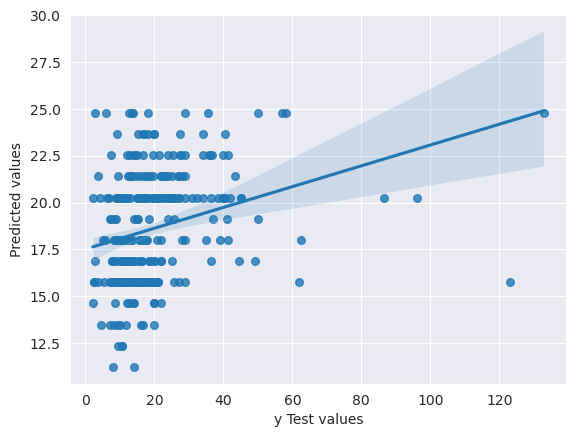

In [130]:
# First plot predictions against true y values

sns.regplot(x=y_test ,y=years_of_schooling_pred, scatter_kws={'s': 30})
plt.xlabel('y Test values')
plt.ylabel('Predicted values')
plt.show()

# Values are far away from the line meaning predictions aren't good enough. 

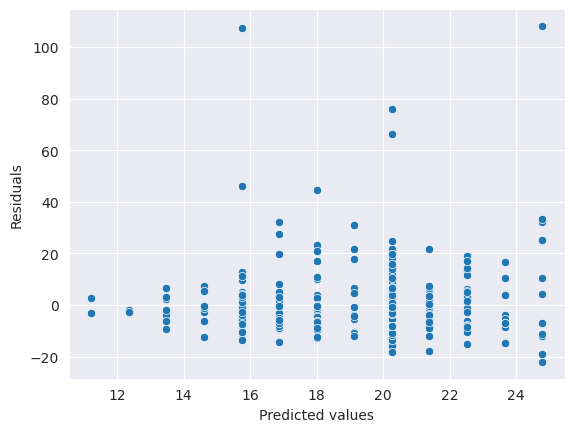

In [131]:
sns.scatterplot(x=years_of_schooling_pred, y=residuals)
plt.ylabel('Residuals')
plt.xlabel('Predicted values')
plt.show()

# There is a bias in our model because there's a pattern in our model

In [132]:
print(f"Mean: {residuals.mean():.3}")
print(f"Skew: {residuals.skew():.3}")

# The mean and skew of the residuals are a bit farther away from 0

Mean: 0.873
Skew: 3.75


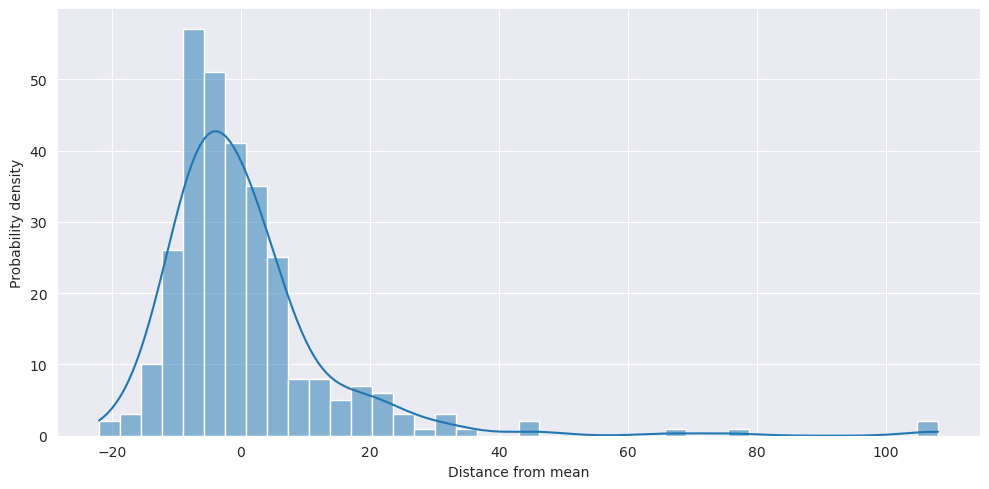

In [133]:
ax=sns.displot(data=residuals, kde=True, aspect=2, bins=40)
ax.set(xlabel='Distance from mean', ylabel='Probability density')
plt.show()

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [134]:
lm.fit(X_train[['S', 'TENURE']], y_train)

LinearRegression()

In [135]:
tenure_years_pred = lm.predict(X_test[['S', 'TENURE']])
r2_score(y_pred=tenure_years_pred, y_true=y_test)

0.08195802506330074

In [136]:
print(f"Training data r_2 score: {lm.score(X_train[['S', 'TENURE']], y_train)}")

Training data r_2 score: 0.10132100499672347


In [137]:
print(f"R-squared score: {lm.score(X_test[['S', 'TENURE']], y_test)}")

# Its a bit higher than before

R-squared score: 0.08195802506330074


### Evaluate the Coefficients of the Model

In [138]:
print(f'Coefficients: {lm.coef_}')

# The coefficients have a positive sign

Coefficients: [1.1069112  0.58781517]


In [139]:
print(f'Intercept: {lm.intercept_:.5}')

Intercept: 0.42883


### Analyse the Estimated Values & Regression Residuals

In [140]:
residuals = y_test - tenure_years_pred 

In [141]:
print(f"Mean: {residuals.mean():.3}")
print(f"Skew: {residuals.skew():.3}")

# Mean a bit closer to 0 while skew a bit further away from 0

Mean: 0.862
Skew: 3.81


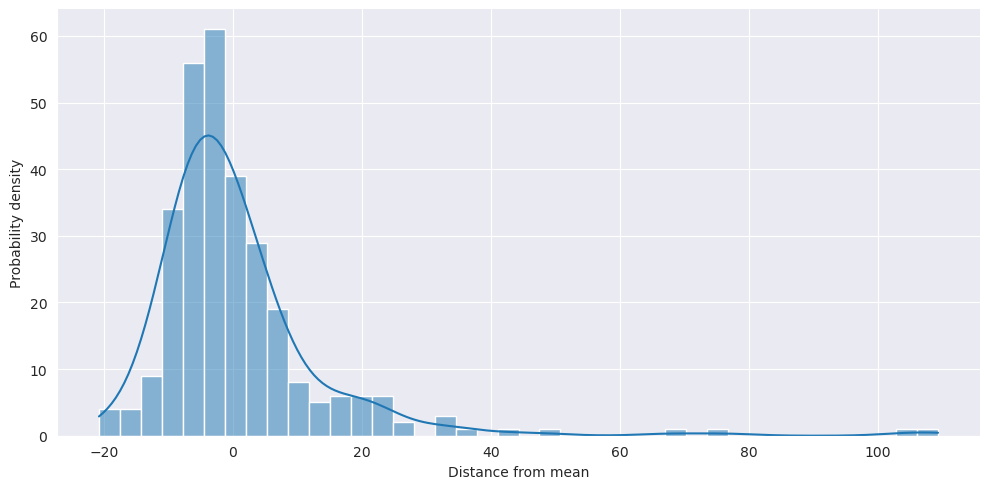

In [142]:
ax=sns.displot(data=residuals, kde=True, aspect=2, bins=40)
ax.set(xlabel='Distance from mean', ylabel='Probability density')
plt.show()

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [143]:
print(f'Dollars earnt: {((12 + 4) * lm.coef_[0]) + (5 * lm.coef_[1]):.5}$')

Dollars earnt: 20.65$


# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 

In [144]:
df_data.isna().sum().sort_values(ascending=False).head(20)

PRMONF      789
PRMONM      636
PRFSTYUN    583
PRFSTYAN    583
PRFSTYPE    583
PRFSTYAE    583
PRMSTYAN    387
PRMSTYAE    387
PRMSTYPE    387
PRMSTYUN    387
SFR         290
POVRAT97    284
HHINC97     282
SMR          57
JOBS         38
AGEMBTH      34
REG97S        0
ID            0
REG97NC       0
REG97NE       0
dtype: int64

First Trial: Try removing columns with missing values and use that data

In [145]:
cols_with_missing_values = ['PRMONF','PRMONM','PRFSTYUN','PRFSTYAN','PRFSTYPE','PRFSTYAE','PRMSTYAN','PRMSTYAE',
                            'PRMSTYPE','PRMSTYUN','SFR','POVRAT97','HHINC97','SMR','JOBS','AGEMBTH']

In [212]:
X = df_data.drop(['EARNINGS','LOCATION', 'EDUCATION', 'GENDER', 'ETHNICITY', 'CATEGORY'], axis=1)\
    .drop(cols_with_missing_values, axis=1)
y = df_data['EARNINGS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [213]:
print(f'X train shape: {X_train.shape}')
print(f'y train shape: {y_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (1189, 79)
y train shape: (1189,)
X test shape: (298, 79)
y test shape: (298,)


In [216]:
lm.fit(X_train, y_train)

LinearRegression()

In [217]:
print(f'Training data score {lm.score(X_train, y_train)}')

Training data score 0.28229748033173074


In [218]:
print(f'Training data score {lm.score(X_test, y_test)}')

Training data score 0.21806492222180962


In [149]:
lm.score(X_test, y_test)

# The score is at least way better than before

0.21806492222180962

Second Trial: Drop columns with parenting style and monitoring data and drop rows with missing values from the remaining columns

In [150]:
new_cols_with_nan = ['PRMONF','PRMONM','PRFSTYUN','PRFSTYAN','PRFSTYPE','PRFSTYAE','PRMSTYAN','PRMSTYAE','PRMSTYPE','PRMSTYUN']
rows_with_nan = ['SFR','POVRAT97','HHINC97','SMR','JOBS','AGEMBTH']

In [151]:
df_data.drop(['EARNINGS','LOCATION', 'EDUCATION', 'GENDER', 'ETHNICITY', 'CATEGORY'], axis=1)\
    .drop(new_cols_with_nan, axis=1).dropna(subset=rows_with_nan).shape

(900, 85)

In [152]:
X = df_data.drop(['EARNINGS','LOCATION', 'EDUCATION', 'GENDER', 'ETHNICITY', 'CATEGORY'], axis=1)\
    .drop(new_cols_with_nan, axis=1).dropna(subset=rows_with_nan)
y = df_data.dropna(subset=rows_with_nan)['EARNINGS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [153]:
print(f'X train shape: {X_train.shape}')
print(f'y train shape: {y_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (720, 85)
y train shape: (720,)
X test shape: (180, 85)
y test shape: (180,)


In [154]:
lm.fit(X_train, y_train)

LinearRegression()

In [155]:
lm.score(X_test, y_test)

# Worse than before

0.15331292734621327

Third trial: Drop cols from dummy variables

In [156]:
dummies_to_drop = ['FEMALE', 'ETHBLACK', 'EDUCPROF', 'SINGLE', 'FAITHC', 'MSA97NO', 'RS97RURL', 'REG97NE', 'HHBMBF',
                   'CATGOV', 'MSA11NO', 'REGNE']

In [157]:
df_data.drop(['EARNINGS','LOCATION', 'EDUCATION', 'GENDER', 'ETHNICITY', 'CATEGORY'], axis=1)\
    .drop(new_cols_with_nan, axis=1).dropna(subset=rows_with_nan).drop(dummies_to_drop, axis=1).shape

(900, 73)

In [158]:
X = df_data.drop(['EARNINGS','LOCATION', 'EDUCATION', 'GENDER', 'ETHNICITY', 'CATEGORY'], axis=1)\
    .drop(new_cols_with_nan, axis=1).dropna(subset=rows_with_nan).drop(dummies_to_drop, axis=1)
y = df_data.dropna(subset=rows_with_nan).drop(dummies_to_drop, axis=1)['EARNINGS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [159]:
print(f'X train shape: {X_train.shape}')
print(f'y train shape: {y_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (720, 73)
y train shape: (720,)
X test shape: (180, 73)
y test shape: (180,)


In [160]:
lm.fit(X_train, y_train)

LinearRegression()

In [161]:
lm.score(X_test, y_test)

# Apparently there's no difference in the score

0.15331292745666436

Fourth Trial: Using the data from the first trial, try using another algorithm like Support Vector Regression 

In [162]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [163]:
X = df_data.drop(['EARNINGS','LOCATION', 'EDUCATION', 'GENDER', 'ETHNICITY', 'CATEGORY'], axis=1)\
    .drop(cols_with_missing_values, axis=1)
y = df_data['EARNINGS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [164]:
print(f'X train shape: {X_train.shape}')
print(f'y train shape: {y_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (1189, 79)
y train shape: (1189,)
X test shape: (298, 79)
y test shape: (298,)


In [165]:
param_grid = {'C': [10000, 1000, 100 ,10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001], 
              'gamma': [10, 1, 0.1, 0.01, 0.001]}

In [166]:
svr = SVR()
grid = GridSearchCV(estimator=svr, param_grid=param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001,
                               0.0001, 1e-05],
                         'gamma': [10, 1, 0.1, 0.01, 0.001]})

In [167]:
grid.best_params_

{'C': 10000, 'gamma': 0.01}

In [168]:
grid.score(X_test, y_test)

# Its way worse then before

0.019052264210501102

Fifth Trial: Use Random Forests Regression

In [169]:
from sklearn.ensemble import RandomForestRegressor

In [170]:
rf = RandomForestRegressor(n_estimators=500, max_features='sqrt')

In [171]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=500)

In [172]:
rf.score(X_test, y_test)

# Better than Support Vector Regression but bit lower than Linear Regression

0.15209418654338103

Sixth Trial: Use Principal Component Analysis to find out which feature explains the most variance 

In [173]:
dropped_df_rows_cols = df_data.iloc[:, :-5].drop(new_cols_with_nan, axis=1).dropna(subset=rows_with_nan)

In [174]:
non_asvab_df = dropped_df_rows_cols.drop(asvab_col_names, axis=1)
asvab_df = dropped_df_rows_cols[asvab_col_names]

In [175]:
# Scale the data except for the asvab columns so that each feature has a single unit variance
scaled_non_asvab = scaler.fit_transform(non_asvab_df)
scaled_non_asvab.shape

(900, 77)

In [176]:
scaled_non_asvab_df = pd.DataFrame(scaled_non_asvab, columns=non_asvab_df.columns)

# Concatenate the scaled non-ASVAB DataFrame and the ASVAB DataFrame
scaled_df = pd.concat([scaled_non_asvab_df, asvab_df.reset_index().drop('index', axis=1)], axis=1)
scaled_df


,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,MSA11NIC,ASVABWK,ASVABPC,ASVABNO,ASVABMV,ASVABCS,ASVABC4,ASVABC,ASVABAR,VERBAL
0,0.33,-0.07,-1.04,1.05,-0.98,0.98,1.39,-1.39,-0.51,-0.05,...,0.00,-0.69,-0.31,-0.36,-0.94,-0.72,-0.32,-0.21,0.12,-0.53
1,-0.84,1.36,0.08,-1.34,-0.98,0.98,1.39,-1.39,-0.72,-0.50,...,0.00,0.33,0.78,0.22,1.20,0.22,1.07,1.15,1.54,0.59
2,-0.44,-0.50,-1.04,0.45,-0.98,0.98,0.67,-0.67,-0.30,0.72,...,0.00,1.01,0.80,-0.76,1.10,0.69,1.02,0.90,0.72,0.97
3,-0.09,-0.76,-0.67,1.08,-0.98,0.98,0.67,-0.67,-0.72,0.11,...,0.00,-0.68,-1.61,-1.31,-1.71,-0.01,-1.62,-2.05,-2.59,-1.22
4,-1.73,-0.53,-0.30,0.34,-0.98,0.98,-0.78,0.78,-0.10,0.11,...,0.00,-0.20,-0.19,-0.46,-0.70,-1.07,-0.32,-0.27,-0.30,-0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,-1.82,-0.35,0.45,0.74,1.02,-1.02,-1.50,1.50,-1.14,0.22,...,0.00,0.34,0.44,-0.07,0.08,-0.15,0.38,0.11,-0.19,0.42
896,0.13,-0.76,-0.30,0.72,1.02,-1.02,-0.05,0.05,-0.10,-0.94,...,0.00,0.93,0.72,-0.25,0.83,0.87,0.69,0.36,-0.18,0.88
897,-0.64,-0.84,-1.04,1.45,1.02,-1.02,-0.05,0.05,0.53,0.16,...,0.00,-0.69,-1.35,0.20,-1.22,-0.53,-0.81,-0.83,-0.50,-1.09
898,-0.32,-0.92,-1.04,0.93,1.02,-1.02,-0.05,0.05,-0.72,0.00,...,0.00,-0.79,-1.73,-1.81,-1.73,-1.15,-1.78,-1.95,-2.29,-1.35


In [177]:
from sklearn.decomposition import PCA

In [178]:
pca = PCA(n_components=2)

In [179]:
pca.fit(scaled_df)

PCA(n_components=2)

In [180]:
x_pca = pca.transform(scaled_df)

In [181]:
x_pca.shape

(900, 2)

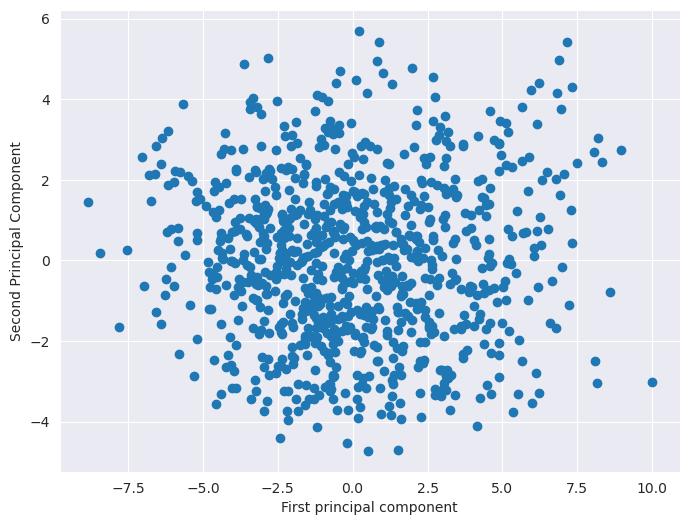

In [182]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:, 0],x_pca[:, 1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

# Not easy to interpret

In [183]:
df_comp = pd.DataFrame(pca.components_,columns=dropped_df_rows_cols.columns)
df_comp

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,0.06,-0.10,-0.23,0.13,-0.04,0.04,0.00,-0.00,-0.12,-0.15,...,-0.00,-0.22,-0.24,-0.19,-0.27,-0.18,-0.26,-0.25,-0.23,-0.24
1,-0.12,0.03,0.01,-0.10,0.01,-0.01,0.08,-0.08,0.03,0.06,...,-0.00,-0.06,-0.06,-0.02,-0.06,-0.02,-0.06,-0.06,-0.05,-0.06


In [184]:
px.imshow(df_comp)

In [185]:
education_col_names = ['EDUCPROF','EDUCPHD','EDUCMAST','EDUCBA','EDUCAA','EDUCHSD','EDUCGED','EDUCDO'] 
parenting_col_names = ['SF', 'SM', 'SFR', 'SMR']

In [186]:
variance_df = df_data[asvab_col_names + living_metro_col_names + living_region_col_names + education_col_names + ['EXP', 'S', 'EARNINGS']]
variance_df.columns

Index(['ASVABWK', 'ASVABPC', 'ASVABNO', 'ASVABMV', 'ASVABCS', 'ASVABC4',
       'ASVABC', 'ASVABAR', 'VERBAL', 'MSA11NO', 'MSA11NCC', 'MSA11CC',
       'MSA11NK', 'MSA11NIC', 'REGNE', 'REGNC', 'REGW', 'REGS', 'EDUCPROF',
       'EDUCPHD', 'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED',
       'EDUCDO', 'EXP', 'S', 'EARNINGS'],
      dtype='object')

In [187]:
X = variance_df.drop('EARNINGS', axis=1)
y = variance_df['EARNINGS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [188]:
print(f'X train shape: {X_train.shape}')
print(f'y train shape: {y_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (1189, 28)
y train shape: (1189,)
X test shape: (298, 28)
y test shape: (298,)


In [189]:
lm.fit(X_train, y_train)

LinearRegression()

In [190]:
lm.score(X_test, y_test)

# Not really better than the first trial score but at least the features explain most of the variance when compared to 
# just the years of schooling and tenure that we used before

0.1651034919111829

Seventh Trial: Use Linear Regression with Gradient Descent

In [191]:
X = df_data.iloc[:, :-5].drop(cols_with_missing_values + ['EARNINGS'], axis=1)
y = df_data['EARNINGS']

X.columns

Index(['ID', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE', 'HHBMBF', 'HHBMOF',
       'HHOMBF', 'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC',
       'MSA97CC', 'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF',
       'EDUCPHD', 'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED',
       'EDUCDO', 'SINGLE', 'MARRIED', 'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP',
       'FAITHC', 'FAITHJ', 'FAITHO', 'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC',
       'ASVABMK', 'ASVABNO', 'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL',
       'ASVABMV', 'HEIGHT', 'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SIBLINGS',
       'REG97NE', 'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN',
       'RS97UNKN', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN', 'REGNE', 'REGNC', 'REGW', 'REGS',
       'MSA11NO', 'MSA11NCC', 'MSA11CC', 'MSA11NK', 'MSA11NIC'],
      dtype='object')

In [192]:
non_asvab_X = X.drop(asvab_col_names, axis=1) 
asvab_X = X[asvab_col_names]

In [193]:
non_asvab_scaled_X = scaler.fit_transform(non_asvab_X)
non_asvab_scaled_X.shape

(1487, 70)

In [194]:
scaled_non_asvab_X_df = pd.DataFrame(non_asvab_scaled_X, columns=non_asvab_X.columns)

# Concatenate the scaled non-ASVAB DataFrame and the ASVAB DataFrame
scaled_X_df = pd.concat([scaled_non_asvab_X_df, asvab_X.reset_index().drop('index', axis=1)], axis=1)
scaled_X_df

,ID,S,EXP,FEMALE,MALE,BYEAR,AGE,HHBMBF,HHBMOF,HHOMBF,...,MSA11NIC,ASVABWK,ASVABPC,ASVABNO,ASVABMV,ASVABCS,ASVABC4,ASVABC,ASVABAR,VERBAL
0,0.36,-0.92,1.05,-0.98,0.98,1.40,-1.40,0.70,-0.31,-0.15,...,0.00,-0.69,-0.31,-0.36,-0.94,-0.72,-0.32,-0.21,0.12,-0.53
1,0.39,0.88,-0.35,-0.98,0.98,-0.05,0.05,0.70,-0.31,-0.15,...,0.00,-0.10,-0.30,-1.21,-0.35,-0.17,-0.14,0.13,0.45,-0.21
2,2.60,-0.20,1.14,-0.98,0.98,-0.77,0.77,-1.44,-0.31,-0.15,...,0.00,0.95,0.06,0.06,0.37,-0.07,0.48,0.51,0.42,0.54
3,2.65,1.25,-1.81,-0.98,0.98,0.68,-0.68,0.70,-0.31,-0.15,...,0.00,-0.06,-0.03,1.68,-0.17,0.32,0.16,0.37,0.71,-0.05
4,-0.77,0.16,-1.32,-0.98,0.98,1.40,-1.40,0.70,-0.31,-0.15,...,0.00,0.33,0.78,0.22,1.20,0.22,1.07,1.15,1.54,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,-0.57,-0.92,1.45,1.02,-1.02,-0.05,0.05,0.70,-0.31,-0.15,...,0.00,-0.69,-1.35,0.20,-1.22,-0.53,-0.81,-0.83,-0.50,-1.09
1483,-0.26,-0.92,0.93,1.02,-1.02,-0.05,0.05,0.70,-0.31,-0.15,...,0.00,-0.79,-1.73,-1.81,-1.73,-1.15,-1.78,-1.95,-2.29,-1.35
1484,0.50,0.88,-0.14,1.02,-1.02,1.40,-1.40,-1.44,3.26,-0.15,...,0.00,0.11,1.45,0.57,0.68,0.74,0.73,0.65,0.40,0.83
1485,0.12,-0.92,0.85,1.02,-1.02,1.40,-1.40,-1.44,-0.31,-0.15,...,0.00,-0.42,-0.18,-1.13,-1.09,-0.69,-0.84,-0.87,-1.28,-0.32


In [195]:
y.reset_index().drop('index', axis=1)['EARNINGS']

0      18.50
1      19.23
2      39.05
3      16.80
4      36.06
        ... 
1482    9.00
1483    8.00
1484    8.57
1485    9.33
1486   14.00
Name: EARNINGS, Length: 1487, dtype: float64

In [196]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X_df, y.reset_index().drop('index', axis=1)['EARNINGS'],
                                                    test_size=0.2, random_state=101)

In [197]:
print(f'X train shape: {X_train.shape}')
print(f'y train shape: {y_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (1189, 79)
y train shape: (1189,)
X test shape: (298, 79)
y test shape: (298,)


In [198]:
# Import the library
from sklearn.linear_model import SGDRegressor

In [199]:
sgdr = SGDRegressor(max_iter=100, alpha=0.0000001)

In [200]:
sgdr.fit(X_train, y_train)

SGDRegressor(alpha=1e-07, max_iter=100)

In [201]:
sgdr.n_iter_

25

In [249]:
sgdr.score(X_test, y_test)

# Scores vary but play around the same score as the first trial

0.21007802275761223

Eight Trial: Linear Regression after dropping some dummy features

In [202]:
X = df_data.iloc[:, :-5].drop(cols_with_missing_values + ['EARNINGS'] + dummies_to_drop, axis=1)
y = df_data['EARNINGS']

X.columns

Index(['ID', 'S', 'EXP', 'MALE', 'BYEAR', 'AGE', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NCC', 'MSA97CC', 'MSA97NK',
       'ETHHISP', 'ETHWHITE', 'EDUCPHD', 'EDUCMAST', 'EDUCBA', 'EDUCAA',
       'EDUCHSD', 'EDUCGED', 'EDUCDO', 'MARRIED', 'COHABIT', 'OTHSING',
       'FAITHN', 'FAITHP', 'FAITHJ', 'FAITHO', 'FAITHM', 'ASVABAR', 'ASVABWK',
       'ASVABPC', 'ASVABMK', 'ASVABNO', 'ASVABCS', 'ASVABC', 'ASVABC4',
       'VERBAL', 'ASVABMV', 'HEIGHT', 'WEIGHT04', 'WEIGHT11', 'SF', 'SM',
       'SIBLINGS', 'REG97NC', 'REG97S', 'REG97W', 'RS97URBN', 'RS97UNKN',
       'HOURS', 'TENURE', 'CATPRI', 'CATNPO', 'CATMIS', 'CATSE', 'COLLBARG',
       'URBAN', 'REGNC', 'REGW', 'REGS', 'MSA11NCC', 'MSA11CC', 'MSA11NK',
       'MSA11NIC'],
      dtype='object')

In [203]:
X.shape

(1487, 67)

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [205]:
lm.fit(X_train, y_train)

LinearRegression()

In [211]:
print(f'Training data r_2 squared score: {lm.score(X_train, y_train)}')

Training data r_2 squared score: 0.2822974803320242


In [210]:
print(f'Test data r_2 squared score: {lm.score(X_test, y_test)}')

# Results aren't any different from before in the first trial.0.21806492222180962

Test data r_2 squared score: 0.21806492216566653


<h2>So overally, the first trial produced the highest r2_score</h2>